In [ ]:
# Q1 why do we use ridge and lasso - to prevent overfitting parameters

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score   # For Cross Validation
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [34]:
df = pd.read_csv('/content/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
X = df.drop('medv', axis= 1)
y = df['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [36]:
# train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.30, random_state=42)

In [37]:
# Standardization of data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [38]:
ridge_regressor = Ridge()
ridge_regressor

Ridge()

In [39]:
parameters = {'alpha' : [1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv = 5)                  # param_grid = if you want to tune more than one parameter with hyperparameter
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [40]:
print(ridgecv.best_params_)

{'alpha': 20}


In [41]:
print(ridgecv.best_score_)

-26.135557476067852


In [42]:
ridge_pred = ridgecv.predict(X_train)

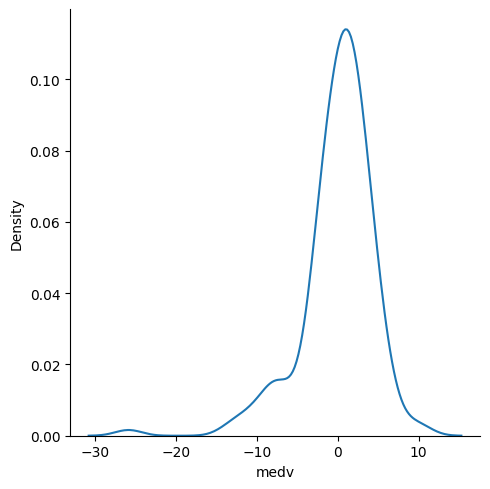

In [43]:
sns.displot(ridge_pred - y_train, kind = 'kde')

In [44]:
score = r2_score(ridge_pred,y_train)
score

0.6283854928603713

In [50]:
# Lasso Implementation

In [51]:
lasso = Lasso()
lasso

Lasso()

In [52]:
parameters = {'alpha' : [1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)                  # param_grid = if you want to tune more than one parameter with hyperparameter
lassocv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [53]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-27.408909557290873


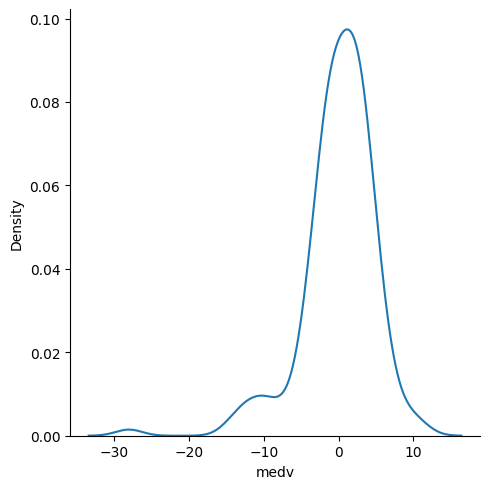

In [54]:
lasso_pred = lassocv.predict(X_train)
sns.displot(lasso_pred - y_train, kind = 'kde')

In [55]:
score = r2_score(lasso_pred,y_train)
score

0.40800191804153063